In [1]:
from selenium import webdriver
import pandas as pd
from time import sleep
from scrapy.selector import Selector
from scrapy.http import HtmlResponse
import requests
import random
from bs4 import BeautifulSoup

In [2]:
# Creating twos driver
driver1 = webdriver.Chrome('C:\chromedriver.exe')
driver2 = webdriver.Chrome('C:\chromedriver.exe')

# Creating a list for links to be appended to
links = []
drivers = [driver1, driver2]

# Range(start, stop, step)
for num in range(0,239,2):
    driver1.get("https://www.mycareersfuture.sg/search?search=data&sortBy=new_posting_date&page="+"{}".format(num))
    driver2.get("https://www.mycareersfuture.sg/search?search=data&sortBy=new_posting_date&page="+"{}".format(num+1))
    sleep(random.randint(4,8))
    
    for driver in drivers:
        page = Selector(text=driver.page_source).xpath('//div[@class="card relative"]/a/@href').extract()
        
        for pages in page:
            links.append('http://www.mycareersfuture.sg'+ pages)
  
    # Periodically print a statement to show status and save links
    if num%5==0:
        print('Done with page {}'.format(num+1))
        
# Create a table of the links and save the table as a csv file in case anything fails inbetween
        link_table = pd.DataFrame({'num':range(len(links)),'links':links})
        link_table.to_csv('careerfutures_links_{}.csv'.format(num+1),index=False)
        
    # Wait after grabbing the info
    sleep(random.randint(2,6))
    
# Create a table of the links and save all the links retrieved
link_table = pd.DataFrame({'num':range(len(links)),'links':links})
link_table.to_csv('careerfutures.csv'.format(num+1),index=False)


# Error message below because I cancelled this part while it was running
# Since I already completed the scraping

WebDriverException: Message: chrome not reachable
  (Session info: chrome=74.0.3729.131)
  (Driver info: chromedriver=2.42.591088 (7b2b2dca23cca0862f674758c9a3933e685c27d5),platform=Windows NT 10.0.17134 x86_64)


In [86]:
# Taking a look at my scraped links
linksdf = pd.read_csv("careerfutures.csv")
linksdf.head()

,num,links
0,0,http://www.mycareersfuture.sg/job/consumer-mar...
1,1,http://www.mycareersfuture.sg/job/analytical-c...
2,2,http://www.mycareersfuture.sg/job/senior-portf...
3,3,http://www.mycareersfuture.sg/job/demand-plann...
4,4,http://www.mycareersfuture.sg/job/service-mana...


In [87]:
# Checking for duplicated links
# Total scraped links
linksdf['links'].duplicated().value_counts()

False    4605
Name: links, dtype: int64

In [88]:
# Total scraped links is 4605
linksdf.shape

(4605, 2)

In [ ]:
# Creating a new DataFrame with the desired columns to save scaped
# information
jobs_df = pd.DataFrame(columns=['Link', 'Num of Applicants', 'Opening Date',
                                'Closing Date', 'Company Name', 'Writeup',
                                'Location', 'Job Title', 'Employment Type',
                                'Seniority', 'Job Category','Salary',
                                'Salary Frequency','Responsibilities',
                                'Requirements'])

In [ ]:
# Creating more drivers to scrap
driver1 = webdriver.Chrome('C:\chromedriver.exe')
driver2 = webdriver.Chrome('C:\chromedriver.exe')
driver3 = webdriver.Chrome('C:\chromedriver.exe')

drivers = [driver1,driver2,driver3]


#Iterate through the pages in steps of (3drivers)
# Range(start, stop, step)
for num in range(0,len(linksdf),3): 
    # Go to the individual jobpages
    driver1.get("{}".format(linksdf['links'][num]))
    driver2.get("{}".format(linksdf['links'][num+1]))
    driver3.get("{}".format(linksdf['links'][num+2]))
    sleep(random.randint(3,10))
    
    # Iterate through the drivers to get the information from each page
    for driver in drivers:
        html = driver.page_source
        soup = BeautifulSoup(html, 'lxml')

        # Save the links
        try:
            jobs_df.loc[num+drivers.index(driver),'Link'] = linksdf['links'][num]
        # Save None if not found
        except:
            jobs_df.loc[num+drivers.index(driver),'Link'] = None
            
        # Save the number of applicants
        try:
            jobs_df.loc[num+drivers.index(driver),'Num of Applicants'] = soup.findAll('span',{'id':'num_of_applications'})[0].text
        # Save None if not found
        except:
            jobs_df.loc[num+drivers.index(driver),'Num of Applicants'] = None
        
        # Save the opening date
        try:
            jobs_df.loc[num+drivers.index(driver),'Opening Date'] = soup.findAll('span',{'id':'last_posted_date'})[0].text
        # Save None if not found
        except:
            jobs_df.loc[num+drivers.index(driver),'Opening Date'] = None
            
        # Save the closing date
        try:
            jobs_df.loc[num+drivers.index(driver),'Closing Date'] = soup.findAll('span',{'id':'expiry_date'})[0].text
        # Save None if not found
        except:
            jobs_df.loc[num+drivers.index(driver),'Closing Date'] = None
        
        # Save the company name
        try:
            jobs_df.loc[num+drivers.index(driver),'Company Name'] = soup.findAll('p',{'class':'f6 fw6 mv0 black-80 mr2 di ttu'})[0].text
        # Save None if not found
        except:
            jobs_df.loc[num+drivers.index(driver),'Company Name'] = None

        # Save the company write-up
        try:
            jobs_df.loc[num+drivers.index(driver),'Writeup'] = soup.findAll('div',{'data-cy':'companyinfo-writeup'})[0].text
        # Save None if not found
        except:
            jobs_df.loc[num+drivers.index(driver),'Writeup'] = None

        # Save the location
        try:
            jobs_df.loc[num+drivers.index(driver),'Location'] = soup.findAll('a',{'class':'link dark-pink underline-hover'})[0].text
        # Save None if not found
        except:
            jobs_df.loc[num+drivers.index(driver),'Location'] = None

        # Save the job title
        try:
            jobs_df.loc[num+drivers.index(driver),'Job Title'] = soup.findAll('h1',{'class':'f3 fw6 mv0 pv0 mb1 dark-pink w-100 dib'})[0].text
        except:
        # Save None if not found
            jobs_df.loc[num+drivers.index(driver),'Job Title'] = None

        #Save Employment type
        try: 
            jobs_df.loc[num+drivers.index(driver),'Employment Type'] = soup.findAll('p',{'id':'employment_type'})[0].text
        # Save None if not found
        except:
            jobs_df.loc[num+drivers.index(driver),'Employment Type'] = None

        # Save Seniority
        try: 
            jobs_df.loc[num+drivers.index(driver),'Seniority'] = soup.findAll('p',{'id':'seniority'})[0].text
        # Save None if not found
        except:
            jobs_df.loc[num+drivers.index(driver),'Seniority'] = None

        # Save Job Category
        try: 
            jobs_df.loc[num+drivers.index(driver),'Job Category'] = soup.findAll('p',{'id':'job-categories'})[0].text
        # Save None if not found
        except:
            jobs_df.loc[num+drivers.index(driver),'Job Category'] = None

        # Save Min Salary
        try: 
            jobs_df.loc[num+drivers.index(driver),'Min Salary'] = soup.findAll('div',{'class':'lh-solid'})[0].text.split('to')[0]
        # Save None if not found
        except:
            jobs_df.loc[num+drivers.index(driver),'Min Salary'] = None

        # Save Max salary
        try:
            jobs_df.loc[num+drivers.index(driver),'Max Salary'] = soup.findAll('div',{'class':'lh-solid'})[0].text.split('to')[1]
        # Save None if not found
        except:
            jobs_df.loc[num+drivers.index(driver),'Max Salary'] = None

        # Save Salary Frequency
        try:
            jobs_df.loc[num+drivers.index(driver),'Salary Frequency'] = soup.findAll('span',{'class':'salary_type dib f5 fw4 black-60 pr1 i pb'})[0].text
        #Save None if not found
        except:
            jobs_df.loc[num+drivers.index(driver),'Salary Frequency'] = None

        #Save responsibilities
        try:
            jobs_df.loc[num+drivers.index(driver),'Responsibilities'] = soup.findAll('div',{'id':'description-content'})[0].text
        #Save None if not found
        except:
            jobs_df.loc[num+drivers.index(driver),'Responsibilities'] = None

        #Save requirements
        try:
            jobs_df.loc[num+drivers.index(driver),'Requirements'] = soup.findAll('div',{'id':'requirements-content'})[0].text
        #Save None if not found
        except:
            jobs_df.loc[num+drivers.index(driver),'Requirements'] = None
    
    # Periodically print a statement to show status and save DataFrame as a csv
    if num%100==0:
        print('{} jobs done'.format(num))
        jobs_df.to_csv('jobs_list {}.csv'.format(num))
    
    # Sleep for a few seconds before pulling the next group of jobs
    sleep(random.randint(4,12))

    
# Save the full Dataframe as a csv
jobs_df.to_csv('jobs_list_done.csv')

# Close all the drivers
for driver in drivers:
    driver.quit()

In [89]:
# Loading up the scraped information
jobsdf = pd.read_csv("scraped_jobs.csv")
jobsdf.head()

,Unnamed: 0,Link,Num of Applicants,Opening Date,Closing Date,Company Name,Writeup,Location,Job Title,Employment Type,Seniority,Job Category,Salary,Salary Frequency,Responsibilities,Requirements,Min Salary,Max Salary
0,0,http://www.mycareersfuture.sg/job/consumer-mar...,0 application,Posted 07 May 2019,Closing on 06 Jun 2019,LOURDES GAVIN PTE. LTD.,\r\n\tLOURDES GAVIN PTE. LTD.\r\n,"SAMSUNG HUB, 3 CHURCH STREET 049483",Consumer & Marketing Insights Analyst (Neurosc...,Full Time,Executive,"Consulting , Marketing / Public Relations",[],Monthly,Able to independently perform project managem...,"Bachelor’s Degree in Statistics, Physical Sci...","$3,000","$4,500"
1,1,http://www.mycareersfuture.sg/job/consumer-mar...,8 applications,Posted 07 May 2019,Closing on 06 Jun 2019,LOURDES GAVIN PTE. LTD.,\r\n\tLOURDES GAVIN PTE. LTD.\r\n,"SAMSUNG HUB, 3 CHURCH STREET 049483",Analytical Chemist (flavour / Chromatography),Full Time,Executive,Sciences / Laboratory / R&D,[],Monthly,Good understanding on various food products a...,"Bachelor degree in chemistry, food science an...","$3,600","$4,800"
2,2,http://www.mycareersfuture.sg/job/consumer-mar...,1 application,Posted 07 May 2019,Closing on 06 Jun 2019,LOURDES GAVIN PTE. LTD.,\r\n\tLOURDES GAVIN PTE. LTD.\r\n,"SAMSUNG HUB, 3 CHURCH STREET 049483",Senior Portfolio Executive (Evaluation / Flavo...,Full Time,Senior Executive,Engineering,[],Monthly,Manage and maintain the regional collection f...,"Min Degree in Food Science, Chemistry or its ...","$4,500","$5,800"
3,3,http://www.mycareersfuture.sg/job/demand-plann...,10 applications,Posted 07 May 2019,Closing on 06 Jun 2019,LOURDES GAVIN PTE. LTD.,\r\n\tLOURDES GAVIN PTE. LTD.\r\n,"SAMSUNG HUB, 3 CHURCH STREET 049483",Demand Planning Analyst (SAP / Demand & Sales ...,Full Time,Senior Executive,Logistics / Supply Chain,NaN,Monthly,Analyse and validate the demand forecast by s...,"Min Diploma in Business Management, Mathemati...","$3,500","$5,300"
4,4,http://www.mycareersfuture.sg/job/demand-plann...,26 applications,Posted 05 May 2019,Closing on 04 Jun 2019,SINGAPORE PRESS HOLDINGS LIMITED,"Incorporated in 1984, main board-listed Singap...","NEWS CENTRE, 1000 TOA PAYOH NORTH 318994",IT Service Management Lead,Full Time,Manager,Information Technology,NaN,Monthly,A key component within the Service Management ...,Degree/Diploma in Computer Science or relate...,"$8,000","$9,000"


In [90]:
# Checking out the shape
# 4605 jobs found with 18 columns (4605 x 18)
jobsdf.shape

(4605, 18)

In [91]:
# Checking out the columns
# 'Unnamed: 0' is probably useless since there's already an index
# Made a mistake when creating the dataframe as well - Created 'Salary'
# When its supposed to be 'Min Salary' & 'Max Salary'
# Dropping these columns before checking through the contents of each column
jobsdf.columns

Index(['Unnamed: 0', 'Link', 'Num of Applicants', 'Opening Date',
       'Closing Date', 'Company Name', 'Writeup', 'Location', 'Job Title',
       'Employment Type', 'Seniority', 'Job Category', 'Salary',
       'Salary Frequency', 'Responsibilities', 'Requirements', 'Min Salary',
       'Max Salary'],
      dtype='object')

In [92]:
# Dropping the abovementioned two columns
jobsdf.drop(labels=['Unnamed: 0', 'Salary'], axis=1, inplace=True)

# Checking if said columns have been dropped; successfully dropped them
jobsdf.columns

Index(['Link', 'Num of Applicants', 'Opening Date', 'Closing Date',
       'Company Name', 'Writeup', 'Location', 'Job Title', 'Employment Type',
       'Seniority', 'Job Category', 'Salary Frequency', 'Responsibilities',
       'Requirements', 'Min Salary', 'Max Salary'],
      dtype='object')

In [93]:
# Checking for null values
jobsdf.info()

# Null value count by columns
# Links: 0
# Num of Applications: 67
# Opening Date: 67
# Closing Date: 67
# Company Name: 67
# Writeup: 509
# Location: 1009
# Job Title: 67
# Employment Type: 67
# Seniority: 157
# Job Category: 67
# Salary Frequency: 701
# Responsibilities: 67
# Requirements: 265
# Min Salary: 703
# Max Salary: 702

# Many columns have 67 null-values, lets check them out and see what's up

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4605 entries, 0 to 4604
Data columns (total 16 columns):
Link                 4605 non-null object
Num of Applicants    4538 non-null object
Opening Date         4538 non-null object
Closing Date         4538 non-null object
Company Name         4538 non-null object
Writeup              4096 non-null object
Location             3596 non-null object
Job Title            4538 non-null object
Employment Type      4538 non-null object
Seniority            4448 non-null object
Job Category         4538 non-null object
Salary Frequency     3904 non-null object
Responsibilities     4538 non-null object
Requirements         4340 non-null object
Min Salary           3902 non-null object
Max Salary           3902 non-null object
dtypes: object(16)
memory usage: 575.7+ KB


In [94]:
# Everything is null for these 67 rows
# Might be a blank page or some issues during the scraping process
# Since everything is null, its kinda useless so i'll drop all these rows
jobsdf[jobsdf['Num of Applicants'].isnull()]

,Link,Num of Applicants,Opening Date,Closing Date,Company Name,Writeup,Location,Job Title,Employment Type,Seniority,Job Category,Salary Frequency,Responsibilities,Requirements,Min Salary,Max Salary
1258,http://www.mycareersfuture.sg/job/research-fel...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1310,http://www.mycareersfuture.sg/job/human-resour...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1526,http://www.mycareersfuture.sg/job/senior-resea...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1535,http://www.mycareersfuture.sg/job/manager-risk...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1673,http://www.mycareersfuture.sg/job/application-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1719,http://www.mycareersfuture.sg/job/hydrographic...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1720,http://www.mycareersfuture.sg/job/hydrographic...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1721,http://www.mycareersfuture.sg/job/hydrographic...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1722,http://www.mycareersfuture.sg/job/manager-huma...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1723,http://www.mycareersfuture.sg/job/manager-huma...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
# Dropping all the 67 rows of all null values
jobsdf = jobsdf[jobsdf['Num of Applicants'].notnull()]
# 4538 x 16 now
jobsdf.shape

# Need to take note to reset my index after all the cleaning is done
jobsdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4538 entries, 0 to 4604
Data columns (total 16 columns):
Link                 4538 non-null object
Num of Applicants    4538 non-null object
Opening Date         4538 non-null object
Closing Date         4538 non-null object
Company Name         4538 non-null object
Writeup              4096 non-null object
Location             3596 non-null object
Job Title            4538 non-null object
Employment Type      4538 non-null object
Seniority            4448 non-null object
Job Category         4538 non-null object
Salary Frequency     3904 non-null object
Responsibilities     4538 non-null object
Requirements         4340 non-null object
Min Salary           3902 non-null object
Max Salary           3902 non-null object
dtypes: object(16)
memory usage: 602.7+ KB


In [96]:
# In order to speed up the cleaning process, it probably makes more sense
# to filter out the actual data science related jobs since my search term was
# 'data' - Gonna have alot of garbage jobs inside my results

# Checking the job responsibilities column with various keywords that are associated
# with a data science related job
# Reduced the number of jobs to 3692 from 4538
jobsdf[jobsdf['Responsibilities'].str.contains('ai|artificial intelligence|machine learning|modelling|modeling|python',case=False)].shape

jobsdf = jobsdf[jobsdf['Responsibilities'].str.contains('analytics|ai|artificial intelligence|machine learning|modelling|modeling|python',case=False)]
jobsdf.head(2)

# Lets check how clean the remaining data is now


,Link,Num of Applicants,Opening Date,Closing Date,Company Name,Writeup,Location,Job Title,Employment Type,Seniority,Job Category,Salary Frequency,Responsibilities,Requirements,Min Salary,Max Salary
0,http://www.mycareersfuture.sg/job/consumer-mar...,0 application,Posted 07 May 2019,Closing on 06 Jun 2019,LOURDES GAVIN PTE. LTD.,\r\n\tLOURDES GAVIN PTE. LTD.\r\n,"SAMSUNG HUB, 3 CHURCH STREET 049483",Consumer & Marketing Insights Analyst (Neurosc...,Full Time,Executive,"Consulting , Marketing / Public Relations",Monthly,Able to independently perform project managem...,"Bachelor’s Degree in Statistics, Physical Sci...","$3,000","$4,500"
1,http://www.mycareersfuture.sg/job/consumer-mar...,8 applications,Posted 07 May 2019,Closing on 06 Jun 2019,LOURDES GAVIN PTE. LTD.,\r\n\tLOURDES GAVIN PTE. LTD.\r\n,"SAMSUNG HUB, 3 CHURCH STREET 049483",Analytical Chemist (flavour / Chromatography),Full Time,Executive,Sciences / Laboratory / R&D,Monthly,Good understanding on various food products a...,"Bachelor degree in chemistry, food science an...","$3,600","$4,800"


In [97]:
# There are still several problematic columns
# Writeup, Location, Seniority, Salary Frequence, Requirements, Min Salary,
# Max Salary

jobsdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3787 entries, 0 to 4604
Data columns (total 16 columns):
Link                 3787 non-null object
Num of Applicants    3787 non-null object
Opening Date         3787 non-null object
Closing Date         3787 non-null object
Company Name         3787 non-null object
Writeup              3423 non-null object
Location             3009 non-null object
Job Title            3787 non-null object
Employment Type      3787 non-null object
Seniority            3703 non-null object
Job Category         3787 non-null object
Salary Frequency     3241 non-null object
Responsibilities     3787 non-null object
Requirements         3607 non-null object
Min Salary           3240 non-null object
Max Salary           3240 non-null object
dtypes: object(16)
memory usage: 503.0+ KB


In [98]:
# Columns where 'Min Salary' & 'Max Salary' are null are likely to be the same
# These jobs are likely to be those where the site lists the salary as
# "Undisclosed". 
# In a perfect situation where there is enough time, I should filter out all these
# jobs with no listed salary and build a model to predict the missing values
# based on the available features. 

# However, for this project, I'll just drop all the rows with null values
jobsdf[jobsdf['Min Salary'].isnull()]

,Link,Num of Applicants,Opening Date,Closing Date,Company Name,Writeup,Location,Job Title,Employment Type,Seniority,Job Category,Salary Frequency,Responsibilities,Requirements,Min Salary,Max Salary
9,http://www.mycareersfuture.sg/job/administrati...,49 applications,Posted 05 May 2019,Closing on 04 Jun 2019,MINISTRY OF FOOTBALL PRIVATE LIMITED,MOF IS SINGAPORE’S TOP 11-A-SIDE FOOTBALL LEAG...,"KITCHENER COMPLEX, 808 FRENCH ROAD 200808",Administrative Assistant,Freelance,Fresh/entry level,Admin / Secretarial,NaN,Admin Assistant Staff *Part time/Full time) ne...,Admin Assistant Staff *Part time/Full time) ne...,NaN,NaN
18,http://www.mycareersfuture.sg/job/sales-admini...,0 application,Posted 04 May 2019,Closing on 03 Jun 2019,HKM HR MANAGEMENT PTE. LTD.,"HKM HR Management, founded in 1996, is a leadi...",134 JURONG GATEWAY ROAD 600134,Sales Administrator,Full Time,Executive,Sales / Retail,NaN,Primarily assists the sales and production te...,Possess at least a GCE 'O' level and above At...,NaN,NaN
19,http://www.mycareersfuture.sg/job/sales-admini...,49 applications,Posted 04 May 2019,Closing on 03 Jun 2019,MODETTI OFFICE SERVICES GROUP PTE. LTD.,"Modetti Office Services Group Pte. Ltd. (""MODE...","INTERNATIONAL PLAZA, 10 ANSON ROAD 079903",Admin Executive / Assistant (Full Time / Fle...,"Permanent, Full Time, Flexi work","Fresh/entry level, Non-executive","Admin / Secretarial, Customer Service, General...",NaN,Our company appreciates those willing to learn...,Requirements • Work on Saturdays (10.30am to...,NaN,NaN
23,http://www.mycareersfuture.sg/job/srtech-speci...,14 applications,Posted 04 May 2019,Closing on 03 Jun 2019,LAZADA SOUTH EAST ASIA PTE. LTD.,LAZADA SOUTH EAST ASIA PTE. LTD. Lazada Group ...,"AXA TOWER, 8 SHENTON WAY 068811",Regional Product Manager- Marketing & Ads,Full Time,Manager,Marketing / Public Relations,NaN,We are looking for an experienced Product Mana...,5+ years professional experience in marketing...,NaN,NaN
25,http://www.mycareersfuture.sg/job/information-...,7 applications,Posted 04 May 2019,Closing on 03 Jun 2019,CKR CONTRACT SERVICES PTE. LTD.,"CKR was formed in 2001 by Mr Arasu, a young, e...","CKR BUILDING, 56 SUNGEI KADUT DRIVE 729573",SENIOR QUANTITY SURVEYOR,Full Time,Executive,Building and Construction,NaN,Contract & Subcontract Management Oversee and...,"Qualification: Diploma / Degree in Civil , B...",NaN,NaN
39,http://www.mycareersfuture.sg/job/data-planner...,2 applications,Posted 03 May 2019,Closing on 02 Jun 2019,CHEIL SINGAPORE PTE. LTD.,"At Cheil, we are passionate about ideas that m...",NaN,Data Planner,"Permanent, Full Time",Professional,Advertising / Media,NaN,Job Description 1. CDM Project Leading [Plan...,Job Requirements Data marketing planning exper...,NaN,NaN
48,http://www.mycareersfuture.sg/job/fb-data-coll...,1 application,Posted 03 May 2019,Closing on 02 Jun 2019,MINISTRY OF FOOTBALL PRIVATE LIMITED,MOF IS SINGAPORE’S TOP 11-A-SIDE FOOTBALL LEAG...,"KITCHENER COMPLEX, 808 FRENCH ROAD 200808",F&B Data Collecting Assistants needed!,Freelance,Fresh/entry level,Sales / Retail,NaN,F&B Data Collecting Assistants needed! Minis...,F&B Data Collecting Assistants needed! Minis...,NaN,NaN
58,http://www.mycareersfuture.sg/job/analyst-seni...,1 application,Posted 03 May 2019,Closing on 02 Jun 2019,SOFTING SINGAPORE PTE. LTD.,Softing Singapore Pte. Ltd.\r\nSofting Singapo...,"CINTECH BUILDING, 73 SCIENCE PARK DRIVE 118254",Senior Software Engineer (Windows desktop),Full Time,Professional,"Engineering, Information Technology, Sciences ...",NaN,"Primary Purpose of this Position To specify, d...",Requirements Proven track record of developi...,NaN,NaN
62,http://www.mycareersfuture.sg/job/sics-researc...,0 application,Posted 03 May 2019,Closing on 31 May 2019,Ministry of Manpower,\r\n\tThe Ministry of Manpower (MOM) aims to d...,18 HAVELOCK ROAD 059764,"Manager / Senior Manager, Compliance Strategy...",Full Time,Manager,Public / Civil Service,NaN,The job holder is responsible for using analyt.

In [99]:
# Dropping all null values
jobsdf.dropna(subset=['Min Salary', 'Max Salary', 'Seniority','Requirements', 
                      'Salary Frequency', 'Location', 'Writeup'],inplace=True)

# 2480 jobs left, still way more than the required 1000 jobs listing
jobsdf.shape

(2480, 16)

In [100]:
# Resetting the index of the dataframe now
jobsdf.reset_index(drop=True, inplace=True)
jobsdf.head()

,Link,Num of Applicants,Opening Date,Closing Date,Company Name,Writeup,Location,Job Title,Employment Type,Seniority,Job Category,Salary Frequency,Responsibilities,Requirements,Min Salary,Max Salary
0,http://www.mycareersfuture.sg/job/consumer-mar...,0 application,Posted 07 May 2019,Closing on 06 Jun 2019,LOURDES GAVIN PTE. LTD.,\r\n\tLOURDES GAVIN PTE. LTD.\r\n,"SAMSUNG HUB, 3 CHURCH STREET 049483",Consumer & Marketing Insights Analyst (Neurosc...,Full Time,Executive,"Consulting , Marketing / Public Relations",Monthly,Able to independently perform project managem...,"Bachelor’s Degree in Statistics, Physical Sci...","$3,000","$4,500"
1,http://www.mycareersfuture.sg/job/consumer-mar...,8 applications,Posted 07 May 2019,Closing on 06 Jun 2019,LOURDES GAVIN PTE. LTD.,\r\n\tLOURDES GAVIN PTE. LTD.\r\n,"SAMSUNG HUB, 3 CHURCH STREET 049483",Analytical Chemist (flavour / Chromatography),Full Time,Executive,Sciences / Laboratory / R&D,Monthly,Good understanding on various food products a...,"Bachelor degree in chemistry, food science an...","$3,600","$4,800"
2,http://www.mycareersfuture.sg/job/consumer-mar...,1 application,Posted 07 May 2019,Closing on 06 Jun 2019,LOURDES GAVIN PTE. LTD.,\r\n\tLOURDES GAVIN PTE. LTD.\r\n,"SAMSUNG HUB, 3 CHURCH STREET 049483",Senior Portfolio Executive (Evaluation / Flavo...,Full Time,Senior Executive,Engineering,Monthly,Manage and maintain the regional collection f...,"Min Degree in Food Science, Chemistry or its ...","$4,500","$5,800"
3,http://www.mycareersfuture.sg/job/demand-plann...,10 applications,Posted 07 May 2019,Closing on 06 Jun 2019,LOURDES GAVIN PTE. LTD.,\r\n\tLOURDES GAVIN PTE. LTD.\r\n,"SAMSUNG HUB, 3 CHURCH STREET 049483",Demand Planning Analyst (SAP / Demand & Sales ...,Full Time,Senior Executive,Logistics / Supply Chain,Monthly,Analyse and validate the demand forecast by s...,"Min Diploma in Business Management, Mathemati...","$3,500","$5,300"
4,http://www.mycareersfuture.sg/job/demand-plann...,26 applications,Posted 05 May 2019,Closing on 04 Jun 2019,SINGAPORE PRESS HOLDINGS LIMITED,"Incorporated in 1984, main board-listed Singap...","NEWS CENTRE, 1000 TOA PAYOH NORTH 318994",IT Service Management Lead,Full Time,Manager,Information Technology,Monthly,A key component within the Service Management ...,Degree/Diploma in Computer Science or relate...,"$8,000","$9,000"


In [101]:
# Removing the $ sign and , from Min Salary column
jobsdf['Min Salary'] = jobsdf['Min Salary'].apply(lambda x: x.replace('$', ''))
jobsdf['Min Salary'] = jobsdf['Min Salary'].apply(lambda x: x.replace(',', ''))
jobsdf['Min Salary'] = jobsdf['Min Salary'].apply(lambda x: int(x))

# Removed all the $ and , and changed data type to integer
jobsdf['Min Salary'].head()

0    3000
1    3600
2    4500
3    3500
4    8000
Name: Min Salary, dtype: int64

In [102]:
# Removing the $ sign and , from Max
jobsdf['Max Salary'] = jobsdf['Max Salary'].apply(lambda x: x.replace('$', ''))
jobsdf['Max Salary'] = jobsdf['Max Salary'].apply(lambda x: x.replace(',', ''))
jobsdf['Max Salary'] = jobsdf['Max Salary'].apply(lambda x: int(x))

# Removed all the $ and , and changed data type to integer
jobsdf['Max Salary'].head()

0    4500
1    4800
2    5800
3    5300
4    9000
Name: Max Salary, dtype: int64

In [103]:
# Checking for types of salary frequency in the dataset
# There's 2399 salary displayed as monthly salary and 81 as annual salary
# Need to convert annual salary numbers into monthly 
jobsdf['Salary Frequency'].value_counts()

Monthly     2399
Annually      81
Name: Salary Frequency, dtype: int64

In [104]:
# Converting 'Min Salary' column annual values to monthly values
jobsdf['Min Salary'][jobsdf['Salary Frequency'] == 'Annually'] = jobsdf['Min Salary'][jobsdf['Salary Frequency'] == 'Annually'] / 12

# Converting 'Max Salary' column annual values to monthly values
jobsdf['Max Salary'][jobsdf['Salary Frequency'] == 'Annually'] = jobsdf['Max Salary'][jobsdf['Salary Frequency'] == 'Annually'] / 12

C:\Users\kengw\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\kengw\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [105]:
# Since I converted all the salary values to monthly values, the 
# 'Salary Frequency' column is kinda meaningless now since all salary is 
# represented in monthly intervals. Therefore, I'm gonna drop this column
jobsdf.drop(labels='Salary Frequency', axis=1, inplace=True)
jobsdf.head(3)

,Link,Num of Applicants,Opening Date,Closing Date,Company Name,Writeup,Location,Job Title,Employment Type,Seniority,Job Category,Responsibilities,Requirements,Min Salary,Max Salary
0,http://www.mycareersfuture.sg/job/consumer-mar...,0 application,Posted 07 May 2019,Closing on 06 Jun 2019,LOURDES GAVIN PTE. LTD.,\r\n\tLOURDES GAVIN PTE. LTD.\r\n,"SAMSUNG HUB, 3 CHURCH STREET 049483",Consumer & Marketing Insights Analyst (Neurosc...,Full Time,Executive,"Consulting , Marketing / Public Relations",Able to independently perform project managem...,"Bachelor’s Degree in Statistics, Physical Sci...",3000.0,4500.0
1,http://www.mycareersfuture.sg/job/consumer-mar...,8 applications,Posted 07 May 2019,Closing on 06 Jun 2019,LOURDES GAVIN PTE. LTD.,\r\n\tLOURDES GAVIN PTE. LTD.\r\n,"SAMSUNG HUB, 3 CHURCH STREET 049483",Analytical Chemist (flavour / Chromatography),Full Time,Executive,Sciences / Laboratory / R&D,Good understanding on various food products a...,"Bachelor degree in chemistry, food science an...",3600.0,4800.0
2,http://www.mycareersfuture.sg/job/consumer-mar...,1 application,Posted 07 May 2019,Closing on 06 Jun 2019,LOURDES GAVIN PTE. LTD.,\r\n\tLOURDES GAVIN PTE. LTD.\r\n,"SAMSUNG HUB, 3 CHURCH STREET 049483",Senior Portfolio Executive (Evaluation / Flavo...,Full Time,Senior Executive,Engineering,Manage and maintain the regional collection f...,"Min Degree in Food Science, Chemistry or its ...",4500.0,5800.0


In [106]:
# Cleaning up the words in 'Opening Date' and 'Closing Date' columns
jobsdf['Opening Date'] = jobsdf['Opening Date'].apply(lambda x: x.replace('Posted', ''))
jobsdf['Closing Date'] = jobsdf['Closing Date'].apply(lambda x: x.replace('Closing on', ''))

In [107]:
# Transforming the 'Opening Date' and 'Closing Date' column into a meaningful
# feature. Gonna calculate the Job Opening Duration by taking the difference
# of the two features (i.e. Closing Date - Opening Date)

# Need to convert column to datetime format so I can subtract from it
jobsdf['Opening Date'] = pd.to_datetime(jobsdf['Opening Date'])
jobsdf['Closing Date'] = pd.to_datetime(jobsdf['Closing Date'])

jobsdf['Job Opening Duration'] = jobsdf['Closing Date'] - jobsdf['Opening Date']
jobsdf.head()

,Link,Num of Applicants,Opening Date,Closing Date,Company Name,Writeup,Location,Job Title,Employment Type,Seniority,Job Category,Responsibilities,Requirements,Min Salary,Max Salary,Job Opening Duration
0,http://www.mycareersfuture.sg/job/consumer-mar...,0 application,2019-05-07,2019-06-06,LOURDES GAVIN PTE. LTD.,\r\n\tLOURDES GAVIN PTE. LTD.\r\n,"SAMSUNG HUB, 3 CHURCH STREET 049483",Consumer & Marketing Insights Analyst (Neurosc...,Full Time,Executive,"Consulting , Marketing / Public Relations",Able to independently perform project managem...,"Bachelor’s Degree in Statistics, Physical Sci...",3000.0,4500.0,30 days
1,http://www.mycareersfuture.sg/job/consumer-mar...,8 applications,2019-05-07,2019-06-06,LOURDES GAVIN PTE. LTD.,\r\n\tLOURDES GAVIN PTE. LTD.\r\n,"SAMSUNG HUB, 3 CHURCH STREET 049483",Analytical Chemist (flavour / Chromatography),Full Time,Executive,Sciences / Laboratory / R&D,Good understanding on various food products a...,"Bachelor degree in chemistry, food science an...",3600.0,4800.0,30 days
2,http://www.mycareersfuture.sg/job/consumer-mar...,1 application,2019-05-07,2019-06-06,LOURDES GAVIN PTE. LTD.,\r\n\tLOURDES GAVIN PTE. LTD.\r\n,"SAMSUNG HUB, 3 CHURCH STREET 049483",Senior Portfolio Executive (Evaluation / Flavo...,Full Time,Senior Executive,Engineering,Manage and maintain the regional collection f...,"Min Degree in Food Science, Chemistry or its ...",4500.0,5800.0,30 days
3,http://www.mycareersfuture.sg/job/demand-plann...,10 applications,2019-05-07,2019-06-06,LOURDES GAVIN PTE. LTD.,\r\n\tLOURDES GAVIN PTE. LTD.\r\n,"SAMSUNG HUB, 3 CHURCH STREET 049483",Demand Planning Analyst (SAP / Demand & Sales ...,Full Time,Senior Executive,Logistics / Supply Chain,Analyse and validate the demand forecast by s...,"Min Diploma in Business Management, Mathemati...",3500.0,5300.0,30 days
4,http://www.mycareersfuture.sg/job/demand-plann...,26 applications,2019-05-05,2019-06-04,SINGAPORE PRESS HOLDINGS LIMITED,"Incorporated in 1984, main board-listed Singap...","NEWS CENTRE, 1000 TOA PAYOH NORTH 318994",IT Service Management Lead,Full Time,Manager,Information Technology,A key component within the Service Management ...,Degree/Diploma in Computer Science or relate...,8000.0,9000.0,30 days


In [108]:
# Dropping the original columns containing the dates
jobsdf.drop(labels=['Opening Date', 'Closing Date'], axis=1, inplace=True)
jobsdf.columns

Index(['Link', 'Num of Applicants', 'Company Name', 'Writeup', 'Location',
       'Job Title', 'Employment Type', 'Seniority', 'Job Category',
       'Responsibilities', 'Requirements', 'Min Salary', 'Max Salary',
       'Job Opening Duration'],
      dtype='object')

In [109]:
# Removing the word 'application' and 'applications' from Num of Applicants
# column and converting the datatype to integer
jobsdf['Num of Applicants'] = jobsdf['Num of Applicants'].apply(lambda x: x.replace('application', ''))
jobsdf['Num of Applicants'] = jobsdf['Num of Applicants'].apply(lambda x: x.replace('applications', ''))
jobsdf['Num of Applicants'] = jobsdf['Num of Applicants'].apply(lambda x: x.replace('s', ''))
jobsdf['Num of Applicants'] = jobsdf['Num of Applicants'].apply(lambda x: int(x))

In [110]:
jobsdf.head(2)

,Link,Num of Applicants,Company Name,Writeup,Location,Job Title,Employment Type,Seniority,Job Category,Responsibilities,Requirements,Min Salary,Max Salary,Job Opening Duration
0,http://www.mycareersfuture.sg/job/consumer-mar...,0,LOURDES GAVIN PTE. LTD.,\r\n\tLOURDES GAVIN PTE. LTD.\r\n,"SAMSUNG HUB, 3 CHURCH STREET 049483",Consumer & Marketing Insights Analyst (Neurosc...,Full Time,Executive,"Consulting , Marketing / Public Relations",Able to independently perform project managem...,"Bachelor’s Degree in Statistics, Physical Sci...",3000.0,4500.0,30 days
1,http://www.mycareersfuture.sg/job/consumer-mar...,8,LOURDES GAVIN PTE. LTD.,\r\n\tLOURDES GAVIN PTE. LTD.\r\n,"SAMSUNG HUB, 3 CHURCH STREET 049483",Analytical Chemist (flavour / Chromatography),Full Time,Executive,Sciences / Laboratory / R&D,Good understanding on various food products a...,"Bachelor degree in chemistry, food science an...",3600.0,4800.0,30 days


In [111]:
# Cleaning the Company Name column of punctuation marks
jobsdf['Company Name'] = jobsdf['Company Name'].apply(lambda x: x.replace('.', '')) 
jobsdf['Company Name'] = jobsdf['Company Name'].apply(lambda x: x.replace(',', '')) 

In [112]:
# Cleaning the Writeup column
jobsdf['Writeup'] = jobsdf['Writeup'].apply(lambda x: x.replace('\r', ''))
jobsdf['Writeup'] = jobsdf['Writeup'].apply(lambda x: x.replace('\n', ''))
jobsdf['Writeup'] = jobsdf['Writeup'].apply(lambda x: x.replace('\t', ''))
jobsdf['Writeup'] = jobsdf['Writeup'].apply(lambda x: x.replace('\xa0', ''))

# Still see fullstops and colons
jobsdf['Writeup'].tail(2).tolist()

['TRELLEBORG SINGAPORE PTE. LTD.',
 '   Acronis is a global leader in backup, disaster recovery, secure file sharing and file access solutions. Over 5 million consumers and 500,000 businesses in 145 countries use Acronis products to protect their data. Founded in 2003 Acronis is a fast-growing technology MNC with a team of over 700 highly skilled specialists working across 23 offices in 18 different countries around the world. More than 300 software engineers from different countries work together to develop sophisticated technological solutions. With Acronis’ focus on Cloud Backup and Disaster Recovery, the company is uniquely positioned to be at the forefront of developing solutions for the information age. Acronis has filed 100+ patents and holds over 50 patents in the areas of advanced backup and recovery technologies.      ABOUT ACRONIS R&D CENTRE, SINGAPORE    Launched in 2015 Acronis’ R&D centre in Singapore is currently looking for highly skilled and innovative software enginee

In [113]:
# Removing all the other punctuation marks
jobsdf['Writeup'] = jobsdf['Writeup'].apply(lambda x: x.replace('.', ' '))
jobsdf['Writeup'] = jobsdf['Writeup'].apply(lambda x: x.replace("’", ' '))
jobsdf['Writeup'] = jobsdf['Writeup'].apply(lambda x: x.replace("-", ' '))
jobsdf['Writeup'] = jobsdf['Writeup'].apply(lambda x: x.replace(",", ''))
jobsdf['Writeup'].tail(2).tolist()

['TRELLEBORG SINGAPORE PTE  LTD ',
 '   Acronis is a global leader in backup disaster recovery secure file sharing and file access solutions  Over 5 million consumers and 500000 businesses in 145 countries use Acronis products to protect their data  Founded in 2003 Acronis is a fast growing technology MNC with a team of over 700 highly skilled specialists working across 23 offices in 18 different countries around the world  More than 300 software engineers from different countries work together to develop sophisticated technological solutions  With Acronis  focus on Cloud Backup and Disaster Recovery the company is uniquely positioned to be at the forefront of developing solutions for the information age  Acronis has filed 100+ patents and holds over 50 patents in the areas of advanced backup and recovery technologies       ABOUT ACRONIS R&D CENTRE SINGAPORE    Launched in 2015 Acronis  R&D centre in Singapore is currently looking for highly skilled and innovative software engineers to

In [114]:
# Cleaning the responsibilities column 
jobsdf['Responsibilities'] = jobsdf['Responsibilities'].apply(lambda x: x.replace('\r', ''))
jobsdf['Responsibilities'] = jobsdf['Responsibilities'].apply(lambda x: x.replace('\n', ''))
jobsdf['Responsibilities'] = jobsdf['Responsibilities'].apply(lambda x: x.replace('\t', ''))
jobsdf['Responsibilities'] = jobsdf['Responsibilities'].apply(lambda x: x.replace('\xa0', ''))
jobsdf['Responsibilities'] = jobsdf['Responsibilities'].apply(lambda x: x.replace('.', ' '))
jobsdf['Responsibilities'] = jobsdf['Responsibilities'].apply(lambda x: x.replace("’", ' '))
jobsdf['Responsibilities'] = jobsdf['Responsibilities'].apply(lambda x: x.replace("-", ' '))
jobsdf['Responsibilities'] = jobsdf['Responsibilities'].apply(lambda x: x.replace(",", ''))
jobsdf['Responsibilities'] = jobsdf['Responsibilities'].apply(lambda x: x.replace("‘", ''))
jobsdf['Responsibilities'] = jobsdf['Responsibilities'].apply(lambda x: x.replace(":", ''))
jobsdf['Responsibilities'] = jobsdf['Responsibilities'].apply(lambda x: x.replace("\u200b", ''))

# Seems okay now
jobsdf['Responsibilities'].tail(2).tolist()

['The Marketing Co Ordinator will provide a broad range of communications and marketing support to the local business  This is a multitasking position with responsibility for development delivery and monitoring of a wide variety of integrated communication and marketing activities  You will have control of managing local exhibitions and you will be a key support for the Trelleborg Offshore group for updating our current websites and social media   You are responsible for  Ensuring adherence to all company policies and prevailing business regulations Manage and provide support for all local tradeshows Provide communications support for internal local programs Support marketing plans for the local business Updating Chinese language website supporting group websites and social media   Your main duties include  Co ordinate the production of a wide range of marketing deliverables for use with multiple communication channels and on and off line  Co ordinate new product and service launches f

In [115]:
# Cleaning the 'Requirements' column
jobsdf['Requirements'] = jobsdf['Requirements'].apply(lambda x: x.replace('\r', ''))
jobsdf['Requirements'] = jobsdf['Requirements'].apply(lambda x: x.replace('\n', ''))
jobsdf['Requirements'] = jobsdf['Requirements'].apply(lambda x: x.replace('\t', ''))
jobsdf['Requirements'] = jobsdf['Requirements'].apply(lambda x: x.replace('\xa0', ''))
jobsdf['Requirements'] = jobsdf['Requirements'].apply(lambda x: x.replace('.', ' '))
jobsdf['Requirements'] = jobsdf['Requirements'].apply(lambda x: x.replace("’", ' '))
jobsdf['Requirements'] = jobsdf['Requirements'].apply(lambda x: x.replace("-", ' '))
jobsdf['Requirements'] = jobsdf['Requirements'].apply(lambda x: x.replace(",", ''))
jobsdf['Requirements'] = jobsdf['Requirements'].apply(lambda x: x.replace("‘", ''))
jobsdf['Requirements'] = jobsdf['Requirements'].apply(lambda x: x.replace(":", ''))
jobsdf['Requirements'] = jobsdf['Requirements'].apply(lambda x: x.replace("\u200b", ''))
jobsdf['Requirements'] = jobsdf['Requirements'].apply(lambda x: x.replace("–", ''))
jobsdf['Requirements'] = jobsdf['Requirements'].apply(lambda x: x.replace("•", ''))
jobsdf['Requirements'] = jobsdf['Requirements'].apply(lambda x: x.replace("·", ''))
jobsdf['Requirements'] = jobsdf['Requirements'].apply(lambda x: x.replace("'", ''))
jobsdf['Requirements'] = jobsdf['Requirements'].apply(lambda x: x.replace("*", ''))
jobsdf['Requirements'] = jobsdf['Requirements'].apply(lambda x: x.replace('"', ''))

# Seems okay now
jobsdf['Requirements'].tail(2).tolist()

['You are expected to have the knowledge skills and abilities to  Work closely in an integrated matrix marketing team Be able to manage a Tradeshow from design to hosting   High computer proficiency with excellent Microsoft Office skills and ability to adapt and learn quickly to new systems  Display confidence energy and creativity  Excellent people skills and an upbeat and enthusiastic attitude  Excellent verbal written and presentation communication skills  Good team player able to work collaboratively and effectively as a team member  Resourcefulness in solving problems Sound understanding of and ability to apply marketing principles and philosophy Strong organizational skills and keen attention to detail  You are likely to be education to  Candidate must possess at least Bachelors Degree/Post Graduate Diploma/Professional Degree in Marketing or equivalent  Required language(s)English Mandarin (To deal with mandarin speaking customer) At least 2Year(s) of working experience in the r

In [116]:
# The job category columns are separated by , or /
# In order to extract them easily later using str.split(), i'll make the all
# be separated by , instead
jobsdf['Job Category'].value_counts().head(5)

Information Technology              672
Engineering                         167
Banking and Finance                 151
Sciences / Laboratory / R&D         130
Accounting / Auditing / Taxation    109
Name: Job Category, dtype: int64

In [117]:
# Replacing the / with ,
jobsdf['Job Category'] = jobsdf['Job Category'].apply(lambda x: x.replace('/', ','))
# Seems like I have done the job successfully
jobsdf['Job Category'].head(50).tolist()

['Consulting , Marketing , Public Relations ',
 'Sciences , Laboratory , R&D',
 'Engineering',
 'Logistics , Supply Chain',
 'Information Technology',
 'Purchasing , Merchandising',
 'Engineering',
 'Engineering, Sciences , Laboratory , R&D',
 'Building and Construction, Information Technology, Sales , Retail ',
 'Others',
 'Information Technology',
 'Human Resources ',
 'Consulting , General Management',
 'Consulting , Information Technology, General Management, Professional Services',
 'Consulting , Engineering, Information Technology, Manufacturing',
 'Manufacturing',
 'Information Technology',
 'Information Technology',
 'Information Technology',
 'Information Technology',
 'Banking and Finance',
 'Banking and Finance',
 'Banking and Finance',
 'Sciences , Laboratory , R&D',
 'Information Technology',
 'Others',
 'Others',
 'Information Technology',
 'Information Technology',
 'Others',
 'Information Technology',
 'Others',
 'Insurance',
 'Information Technology',
 'Engineering',
 

In [118]:
# Need to extract out all the unique kinds of Job Category now
categories = set()
for row in jobsdf['Job Category'].str.split(','):
    for category in row:
        if category not in categories:
            categories.add(' '.join(category.split()))
            
# Checking to see all the unique Job Categories that I extracted
categories

{'Accounting',
 'Admin',
 'Advertising',
 'Architecture',
 'Auditing',
 'Banking and Finance',
 'Beauty',
 'Building and Construction',
 'Civil Service',
 'Consulting',
 'Customer Service',
 'Design',
 'Education and Training',
 'Engineering',
 'Entertainment',
 'Environment',
 'Events',
 'F&B',
 'General Management',
 'General Work',
 'Health',
 'Healthcare',
 'Hospitality',
 'Human Resources',
 'Information Technology',
 'Insurance',
 'Interior Design',
 'Laboratory',
 'Legal',
 'Logistics',
 'Manufacturing',
 'Marketing',
 'Media',
 'Medical',
 'Merchandising',
 'Others',
 'Personal Care',
 'Pharmaceutical',
 'Professional Services',
 'Promotions',
 'Property Management',
 'Public',
 'Public Relations',
 'Purchasing',
 'R&D',
 'Real Estate',
 'Repair and Maintenance',
 'Retail',
 'Risk Management',
 'Sales',
 'Sciences',
 'Secretarial',
 'Security and Investigation',
 'Social Services',
 'Supply Chain',
 'Taxation',
 'Telecommunications',
 'Therapy Services',
 'Tourism',
 'Travel'}

In [119]:
# Creating one feature column for each Job Category that exists
# For each feature column, 1 will be assigned to cell if that job contains
# the job category. 0 if it doesn't
# I don't think I can use a binarizer to do this (or maybe I'm wrong) cause
# it will just assign JobCat1, JobCat2 as one unique feature instead of 
# separating it into 1 for JobCat1 and 1 for JobCat2.
for category in categories:
    jobsdf[category] = [1 if category in cat else 0 for cat in jobsdf['Job Category']]

jobsdf.head()

,Link,Num of Applicants,Company Name,Writeup,Location,Job Title,Employment Type,Seniority,Job Category,Responsibilities,...,Therapy Services,Interior Design,Design,Public Relations,Medical,Environment,Admin,Retail,Travel,Hospitality
0,http://www.mycareersfuture.sg/job/consumer-mar...,0,LOURDES GAVIN PTE LTD,LOURDES GAVIN PTE LTD,"SAMSUNG HUB, 3 CHURCH STREET 049483",Consumer & Marketing Insights Analyst (Neurosc...,Full Time,Executive,"Consulting , Marketing , Public Relations",Able to independently perform project managem...,...,0,0,0,1,0,0,0,0,0,0
1,http://www.mycareersfuture.sg/job/consumer-mar...,8,LOURDES GAVIN PTE LTD,LOURDES GAVIN PTE LTD,"SAMSUNG HUB, 3 CHURCH STREET 049483",Analytical Chemist (flavour / Chromatography),Full Time,Executive,"Sciences , Laboratory , R&D",Good understanding on various food products a...,...,0,0,0,0,0,0,0,0,0,0
2,http://www.mycareersfuture.sg/job/consumer-mar...,1,LOURDES GAVIN PTE LTD,LOURDES GAVIN PTE LTD,"SAMSUNG HUB, 3 CHURCH STREET 049483",Senior Portfolio Executive (Evaluation / Flavo...,Full Time,Senior Executive,Engineering,Manage and maintain the regional collection f...,...,0,0,0,0,0,0,0,0,0,0
3,http://www.mycareersfuture.sg/job/demand-plann...,10,LOURDES GAVIN PTE LTD,LOURDES GAVIN PTE LTD,"SAMSUNG HUB, 3 CHURCH STREET 049483",Demand Planning Analyst (SAP / Demand & Sales ...,Full Time,Senior Executive,"Logistics , Supply Chain",Analyse and validate the demand forecast by s...,...,0,0,0,0,0,0,0,0,0,0
4,http://www.mycareersfuture.sg/job/demand-plann...,26,SINGAPORE PRESS HOLDINGS LIMITED,Incorporated in 1984 main board listed Singapo...,"NEWS CENTRE, 1000 TOA PAYOH NORTH 318994",IT Service Management Lead,Full Time,Manager,Information Technology,A key component within the Service Management ...,...,0,0,0,0,0,0,0,0,0,0


In [120]:
# Need to extract out all the unique kinds of Seniority now
ranks = set()
for row in jobsdf['Seniority'].str.split(','):
    for rank in row:
        if rank not in ranks:
            ranks.add(' '.join(rank.split()))


In [121]:
# Turning each seniority rank into a feature
for rank in ranks:
    jobsdf[rank] = [1 if rank in seniority else 0 for seniority in jobsdf['Seniority']]
jobsdf.head()    

,Link,Num of Applicants,Company Name,Writeup,Location,Job Title,Employment Type,Seniority,Job Category,Responsibilities,...,Hospitality,Senior Management,Non-executive,Fresh/entry level,Middle Management,Manager,Junior Executive,Senior Executive,Executive,Professional
0,http://www.mycareersfuture.sg/job/consumer-mar...,0,LOURDES GAVIN PTE LTD,LOURDES GAVIN PTE LTD,"SAMSUNG HUB, 3 CHURCH STREET 049483",Consumer & Marketing Insights Analyst (Neurosc...,Full Time,Executive,"Consulting , Marketing , Public Relations",Able to independently perform project managem...,...,0,0,0,0,0,0,0,0,1,0
1,http://www.mycareersfuture.sg/job/consumer-mar...,8,LOURDES GAVIN PTE LTD,LOURDES GAVIN PTE LTD,"SAMSUNG HUB, 3 CHURCH STREET 049483",Analytical Chemist (flavour / Chromatography),Full Time,Executive,"Sciences , Laboratory , R&D",Good understanding on various food products a...,...,0,0,0,0,0,0,0,0,1,0
2,http://www.mycareersfuture.sg/job/consumer-mar...,1,LOURDES GAVIN PTE LTD,LOURDES GAVIN PTE LTD,"SAMSUNG HUB, 3 CHURCH STREET 049483",Senior Portfolio Executive (Evaluation / Flavo...,Full Time,Senior Executive,Engineering,Manage and maintain the regional collection f...,...,0,0,0,0,0,0,0,1,1,0
3,http://www.mycareersfuture.sg/job/demand-plann...,10,LOURDES GAVIN PTE LTD,LOURDES GAVIN PTE LTD,"SAMSUNG HUB, 3 CHURCH STREET 049483",Demand Planning Analyst (SAP / Demand & Sales ...,Full Time,Senior Executive,"Logistics , Supply Chain",Analyse and validate the demand forecast by s...,...,0,0,0,0,0,0,0,1,1,0
4,http://www.mycareersfuture.sg/job/demand-plann...,26,SINGAPORE PRESS HOLDINGS LIMITED,Incorporated in 1984 main board listed Singapo...,"NEWS CENTRE, 1000 TOA PAYOH NORTH 318994",IT Service Management Lead,Full Time,Manager,Information Technology,A key component within the Service Management ...,...,0,0,0,0,0,1,0,0,0,0


In [122]:
# Dropping the original "Seniority" and "Job Category" columns since
# I have already represented the data in 1/0 format
jobsdf.drop(labels=['Seniority', 'Job Category'], axis=1, inplace=True)
jobsdf.columns

Index(['Link', 'Num of Applicants', 'Company Name', 'Writeup', 'Location',
       'Job Title', 'Employment Type', 'Responsibilities', 'Requirements',
       'Min Salary', 'Max Salary', 'Job Opening Duration', 'Customer Service',
       'Architecture', 'Others', 'General Work', 'R&D', 'Taxation',
       'Marketing', 'Accounting', 'Public', 'Purchasing', 'Consulting',
       'Entertainment', 'Real Estate', 'Laboratory', 'Education and Training',
       'Information Technology', 'Insurance', 'Supply Chain', 'Engineering',
       'Media', 'Healthcare', 'Social Services', 'Events', 'Pharmaceutical',
       'Building and Construction', 'Health', 'Promotions', 'Human Resources',
       'Sciences', 'Civil Service', 'Beauty', 'Sales', 'F&B', 'Advertising',
       'Manufacturing', 'Risk Management', 'Auditing', 'Tourism',
       'Security and Investigation', 'Secretarial', 'Logistics',
       'Property Management', 'Personal Care', 'Merchandising',
       'Professional Services', 'Banking and Fi

In [123]:
# I think I'd like to focus on the type of skills/keywords that determine
# how much salary one gets. So for this reason, I'll drop the following 
# columns from my dataset: Location, Job Title, Company Name
# I'll keep the 'Num of Applicants' and 'Job Opening Duration' 
# columns since I have already processed the data.
# 'Link' colkumn is pretty useless since it doesn't provide any meaningful
# information. For that reason, I'll drop it too.
jobsdf.drop(labels=['Location', 'Job Title', 'Company Name', 'Link'], axis=1, inplace=True)
jobsdf.columns

# After this, I'll need to process the 'Employment Type' and combine the salary
# columns into one target column for prediction

Index(['Num of Applicants', 'Writeup', 'Employment Type', 'Responsibilities',
       'Requirements', 'Min Salary', 'Max Salary', 'Job Opening Duration',
       'Customer Service', 'Architecture', 'Others', 'General Work', 'R&D',
       'Taxation', 'Marketing', 'Accounting', 'Public', 'Purchasing',
       'Consulting', 'Entertainment', 'Real Estate', 'Laboratory',
       'Education and Training', 'Information Technology', 'Insurance',
       'Supply Chain', 'Engineering', 'Media', 'Healthcare', 'Social Services',
       'Events', 'Pharmaceutical', 'Building and Construction', 'Health',
       'Promotions', 'Human Resources', 'Sciences', 'Civil Service', 'Beauty',
       'Sales', 'F&B', 'Advertising', 'Manufacturing', 'Risk Management',
       'Auditing', 'Tourism', 'Security and Investigation', 'Secretarial',
       'Logistics', 'Property Management', 'Personal Care', 'Merchandising',
       'Professional Services', 'Banking and Finance', 'Legal',
       'Telecommunications', 'Repair an

In [124]:
# Categorical type with alot of composites for numerous jobs
# Will need to transform it the same way as 'Job Category'/'Seniority' columns
jobsdf['Employment Type'].value_counts()

Full Time                                                                                  875
Permanent                                                                                  602
Permanent, Full Time                                                                       481
Contract, Full Time                                                                        217
Contract                                                                                   204
Permanent, Contract, Full Time                                                              23
Permanent, Contract                                                                         21
Temporary                                                                                   21
Contract, Flexi work, Freelance, Full Time, Internship, Part Time, Permanent, Temporary      4
Temporary, Contract                                                                          4
Part Time                                         

In [125]:
# Need to extract out all the unique kinds of Employment Types now
# Using poop to represent type cause type came up as a green word
etypes = set()
for row in jobsdf['Employment Type'].str.split(','):
    for poop in row:
        if poop not in etypes:
            etypes.add(' '.join(poop.split()))
            
# Checking to see what unique ranks there are
etypes

{'Contract',
 'Flexi work',
 'Freelance',
 'Full Time',
 'Internship',
 'Part Time',
 'Permanent',
 'Temporary'}

In [126]:
# Turning each Employment Type into a feature
for poop in etypes:
    jobsdf[poop] = [1 if poop in lala else 0 for lala in jobsdf['Employment Type']]

jobsdf.head()  

,Num of Applicants,Writeup,Employment Type,Responsibilities,Requirements,Min Salary,Max Salary,Job Opening Duration,Customer Service,Architecture,...,Executive,Professional,Contract,Permanent,Part Time,Freelance,Flexi work,Full Time,Internship,Temporary
0,0,LOURDES GAVIN PTE LTD,Full Time,Able to independently perform project managem...,Bachelor s Degree in Statistics Physical Scie...,3000.0,4500.0,30 days,0,0,...,1,0,0,0,0,0,0,1,0,0
1,8,LOURDES GAVIN PTE LTD,Full Time,Good understanding on various food products a...,Bachelor degree in chemistry food science and...,3600.0,4800.0,30 days,0,0,...,1,0,0,0,0,0,0,1,0,0
2,1,LOURDES GAVIN PTE LTD,Full Time,Manage and maintain the regional collection f...,Min Degree in Food Science Chemistry or its e...,4500.0,5800.0,30 days,0,0,...,1,0,0,0,0,0,0,1,0,0
3,10,LOURDES GAVIN PTE LTD,Full Time,Analyse and validate the demand forecast by s...,Min Diploma in Business Management Mathematic...,3500.0,5300.0,30 days,0,0,...,1,0,0,0,0,0,0,1,0,0
4,26,Incorporated in 1984 main board listed Singapo...,Full Time,A key component within the Service Management ...,Degree/Diploma in Computer Science or relate...,8000.0,9000.0,30 days,0,0,...,0,0,0,0,0,0,0,1,0,0


In [127]:
# 77 + 8 = 85
# Successfully added all the Employment Types as a feature
jobsdf.columns

Index(['Num of Applicants', 'Writeup', 'Employment Type', 'Responsibilities',
       'Requirements', 'Min Salary', 'Max Salary', 'Job Opening Duration',
       'Customer Service', 'Architecture', 'Others', 'General Work', 'R&D',
       'Taxation', 'Marketing', 'Accounting', 'Public', 'Purchasing',
       'Consulting', 'Entertainment', 'Real Estate', 'Laboratory',
       'Education and Training', 'Information Technology', 'Insurance',
       'Supply Chain', 'Engineering', 'Media', 'Healthcare', 'Social Services',
       'Events', 'Pharmaceutical', 'Building and Construction', 'Health',
       'Promotions', 'Human Resources', 'Sciences', 'Civil Service', 'Beauty',
       'Sales', 'F&B', 'Advertising', 'Manufacturing', 'Risk Management',
       'Auditing', 'Tourism', 'Security and Investigation', 'Secretarial',
       'Logistics', 'Property Management', 'Personal Care', 'Merchandising',
       'Professional Services', 'Banking and Finance', 'Legal',
       'Telecommunications', 'Repair an

In [128]:
# Dropping the original 'Employment Type' column
jobsdf.drop(labels='Employment Type', axis=1, inplace=True)

In [129]:
# Gonna combine the 'Min Salary' and 'Max Salary' column into one column
jobsdf['Salary'] = (jobsdf['Max Salary'] + jobsdf['Min Salary']) / 2
jobsdf['Salary']

0        3750.0
1        4200.0
2        5150.0
3        4400.0
4        8500.0
5        3750.0
6        3000.0
7        3350.0
8        4000.0
9        3200.0
10       9500.0
11      11000.0
12       5500.0
13       9500.0
14       3750.0
15       2250.0
16       7500.0
17       5275.0
18       7500.0
19       5275.0
20      11500.0
21      11000.0
22       6875.0
23       7500.0
24       5000.0
25       5000.0
26       7000.0
27       5000.0
28       3750.0
29       5500.0
         ...   
2450     3750.0
2451     2400.0
2452     2400.0
2453     1550.0
2454     6000.0
2455     8750.0
2456     6000.0
2457     4500.0
2458     2000.0
2459     1600.0
2460     2500.0
2461     2250.0
2462     6250.0
2463    11250.0
2464     5750.0
2465     2400.0
2466    10500.0
2467     2500.0
2468     8000.0
2469     8750.0
2470     3750.0
2471     3750.0
2472     8000.0
2473     2050.0
2474     4000.0
2475     2700.0
2476     2450.0
2477     2100.0
2478     3250.0
2479     6000.0
Name: Salary, Length: 24

In [130]:
# Gonna drop the original 'Min Salary' and 'Max Salary' columns

jobsdf.drop(labels=['Min Salary', 'Max Salary'], axis=1, inplace=True)
jobsdf.head(3)

,Num of Applicants,Writeup,Responsibilities,Requirements,Job Opening Duration,Customer Service,Architecture,Others,General Work,R&D,...,Professional,Contract,Permanent,Part Time,Freelance,Flexi work,Full Time,Internship,Temporary,Salary
0,0,LOURDES GAVIN PTE LTD,Able to independently perform project managem...,Bachelor s Degree in Statistics Physical Scie...,30 days,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,3750.0
1,8,LOURDES GAVIN PTE LTD,Good understanding on various food products a...,Bachelor degree in chemistry food science and...,30 days,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,4200.0
2,1,LOURDES GAVIN PTE LTD,Manage and maintain the regional collection f...,Min Degree in Food Science Chemistry or its e...,30 days,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,5150.0


In [131]:
# Decided that I'm gonna use classification instead of regression
# Therefore, I need to change the salary column into a classification target
# Let's see where to draw the line first by looking at how the salary is
# distributed
jobsdf['Salary'].describe()

# There's some crazy outlier values right there
# The min value is either a mistake or someone is being a big miser
# The max value is also pretty ridiculous, getting paid 54k a month is 600k+ per year
# Whether this is true or not, I think its probably better to remove these values
# to not screw my model up

count     2480.000000
mean      6098.822110
std       3687.588202
min          1.500000
25%       3500.000000
50%       5287.500000
75%       7750.000000
max      53500.000000
Name: Salary, dtype: float64

In [132]:
# Lets try to filter out the low outliers first
# I think anything under 1k/mth for a data science job is ridiculous, let's
# go with this as a baseline for outlier

jobsdf[jobsdf['Salary'] < 1001]
# Upon closer inspection, I think 500+ is alright. There's only two crazy values
# here. One is 1.5 bucks/mth another is 8 bucks/mth. Let's remove them

jobsdf = jobsdf[jobsdf['Salary'] > 10]

In [133]:
# Lets check the high outliers first
# I'll just go with 25k/mth as the baseline
# There's 5 jobs like that. Let's use a distribution plot to see better
jobsdf[jobsdf['Salary'] > 24999]

,Num of Applicants,Writeup,Responsibilities,Requirements,Job Opening Duration,Customer Service,Architecture,Others,General Work,R&D,...,Professional,Contract,Permanent,Part Time,Freelance,Flexi work,Full Time,Internship,Temporary,Salary
591,109,AMAZON ASIA PACIFIC HOLDINGS PRIVATE LIMITE...,At Amazon we're working to be the most custome...,MBA or CPA Preferred Management experience w...,30 days,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,25000.000000
1022,4,SAMSUNG SDS ASIA PACIFIC PTE LTD,Compile complex data sets from a variety of ...,Bachelors degree in Mathematics Computer Scie...,30 days,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,37500.000000
1578,3,Gateway Search Pte Ltd (Licence No: 18S9060) p...,Job Description Minimum 2 years of applicatio...,2 years experience in designing developing d...,30 days,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,40000.000000
1708,1,Headquartered in the Netherlands Randstad i...,In this role as a Technical Consultant the can...,Requirements Degree in Information Technolog...,30 days,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,53500.000000
2068,35,AspenTech s mission is to digitally transform ...,AspenTech is a leading supplier of software th...,Bachelor s degree (Engineering/Technical subj...,30 days,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,28541.666667


C:\Users\kengw\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


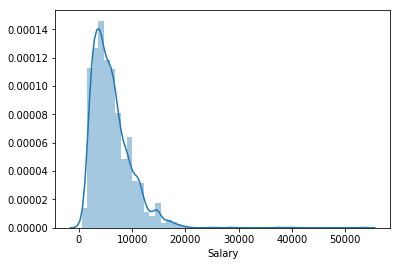

In [134]:
import seaborn as sns
sns.distplot(jobsdf['Salary'], bins=50)

# From the distribution plot, it seems like past 20k-ish is the point where it
# starts to be stupid. I'll probably remove values past 20k

In [135]:
# Yup only 7 jobs with salary over 20k/mth
jobsdf[jobsdf['Salary'] > 19999]

,Num of Applicants,Writeup,Responsibilities,Requirements,Job Opening Duration,Customer Service,Architecture,Others,General Work,R&D,...,Professional,Contract,Permanent,Part Time,Freelance,Flexi work,Full Time,Internship,Temporary,Salary
591,109,AMAZON ASIA PACIFIC HOLDINGS PRIVATE LIMITE...,At Amazon we're working to be the most custome...,MBA or CPA Preferred Management experience w...,30 days,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,25000.000000
1022,4,SAMSUNG SDS ASIA PACIFIC PTE LTD,Compile complex data sets from a variety of ...,Bachelors degree in Mathematics Computer Scie...,30 days,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,37500.000000
1214,28,GOOGLE ASIA PACIFIC PTE LTD,Company overview Google is not a conventional ...,Minimum qualifications Bachelors degree or e...,30 days,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,20625.000000
1468,46,JDA Software is the leading supply chain softw...,As a member of the Chief Customer Office the C...,A background of extensive experience and succ...,30 days,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,20000.000000
1578,3,Gateway Search Pte Ltd (Licence No: 18S9060) p...,Job Description Minimum 2 years of applicatio...,2 years experience in designing developing d...,30 days,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,40000.000000
1708,1,Headquartered in the Netherlands Randstad i...,In this role as a Technical Consultant the can...,Requirements Degree in Information Technolog...,30 days,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,53500.000000
2068,35,AspenTech s mission is to digitally transform ...,AspenTech is a leading supplier of software th...,Bachelor s degree (Engineering/Technical subj...,30 days,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,28541.666667


In [136]:
# Removing all the jobs where salary exceeds 20k
jobsdf = jobsdf[jobsdf['Salary'] < 20000]

jobsdf.reset_index(drop=True, inplace=True)
jobsdf.info()

# Gonna now convert the salary into two categories
# Judging from the distribution plot, I would say that those people earning
# 10k+/mth will be considered the high-earners

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2471 entries, 0 to 2470
Data columns (total 83 columns):
Num of Applicants             2471 non-null int64
Writeup                       2471 non-null object
Responsibilities              2471 non-null object
Requirements                  2471 non-null object
Job Opening Duration          2471 non-null timedelta64[ns]
Customer Service              2471 non-null int64
Architecture                  2471 non-null int64
Others                        2471 non-null int64
General Work                  2471 non-null int64
R&D                           2471 non-null int64
Taxation                      2471 non-null int64
Marketing                     2471 non-null int64
Accounting                    2471 non-null int64
Public                        2471 non-null int64
Purchasing                    2471 non-null int64
Consulting                    2471 non-null int64
Entertainment                 2471 non-null int64
Real Estate                   

In [137]:
# Binarizing 'Salary Column' now. 1 if salary is 10k+, 0 if salary is below 10k
# The new created column will serve as the target variable
jobsdf['Salary Category'] = [1 if salary >= 10000 else 0 for salary in jobsdf['Salary']]
jobsdf.head()

,Num of Applicants,Writeup,Responsibilities,Requirements,Job Opening Duration,Customer Service,Architecture,Others,General Work,R&D,...,Contract,Permanent,Part Time,Freelance,Flexi work,Full Time,Internship,Temporary,Salary,Salary Category
0,0,LOURDES GAVIN PTE LTD,Able to independently perform project managem...,Bachelor s Degree in Statistics Physical Scie...,30 days,0,0,0,0,0,...,0,0,0,0,0,1,0,0,3750.0,0
1,8,LOURDES GAVIN PTE LTD,Good understanding on various food products a...,Bachelor degree in chemistry food science and...,30 days,0,0,0,0,1,...,0,0,0,0,0,1,0,0,4200.0,0
2,1,LOURDES GAVIN PTE LTD,Manage and maintain the regional collection f...,Min Degree in Food Science Chemistry or its e...,30 days,0,0,0,0,0,...,0,0,0,0,0,1,0,0,5150.0,0
3,10,LOURDES GAVIN PTE LTD,Analyse and validate the demand forecast by s...,Min Diploma in Business Management Mathematic...,30 days,0,0,0,0,0,...,0,0,0,0,0,1,0,0,4400.0,0
4,26,Incorporated in 1984 main board listed Singapo...,A key component within the Service Management ...,Degree/Diploma in Computer Science or relate...,30 days,0,0,0,0,0,...,0,0,0,0,0,1,0,0,8500.0,0


In [138]:
# Dropping the original salary column
jobsdf.drop(labels='Salary', axis=1, inplace=True)
jobsdf.columns

Index(['Num of Applicants', 'Writeup', 'Responsibilities', 'Requirements',
       'Job Opening Duration', 'Customer Service', 'Architecture', 'Others',
       'General Work', 'R&D', 'Taxation', 'Marketing', 'Accounting', 'Public',
       'Purchasing', 'Consulting', 'Entertainment', 'Real Estate',
       'Laboratory', 'Education and Training', 'Information Technology',
       'Insurance', 'Supply Chain', 'Engineering', 'Media', 'Healthcare',
       'Social Services', 'Events', 'Pharmaceutical',
       'Building and Construction', 'Health', 'Promotions', 'Human Resources',
       'Sciences', 'Civil Service', 'Beauty', 'Sales', 'F&B', 'Advertising',
       'Manufacturing', 'Risk Management', 'Auditing', 'Tourism',
       'Security and Investigation', 'Secretarial', 'Logistics',
       'Property Management', 'Personal Care', 'Merchandising',
       'Professional Services', 'Banking and Finance', 'Legal',
       'Telecommunications', 'Repair and Maintenance', 'General Management',
       'T

In [139]:
# I now need to transform the writeup, responsibilities and requirements with
# a vectorizer. This should be the last processing step before I can start my
# modelling.

In [140]:
# Importing the vectorizer
from sklearn.feature_extraction.text import CountVectorizer

NOTE:
1. I initially tried with tfidf vectorizer, but changed to CountVectorizer to test out the results
2. This explains why the vectorizer names is stated as tfidf when I used cvec
3. I switched because I wanted to see if vectorizing with tfidf might produce better results but its still pretty garbage in the end.
5. I was pretty lazy to duplicate my code hence there's only the latest copy of it done with countvectorizer
6. I also switched my ngram_range from (1,1) to (1,2) last minute and some of the comments were written when ngram_range was (1,1)

In [141]:
# Creating the tfid vectorizer
# Gonna remove the stop_words and will set an arbitrary number 250 of max features
# This is reduce number of features in mode
# This number can probably be tweaked to improve model performance
tfidf1 = CountVectorizer(ngram_range=(1,2), stop_words='english', max_features=250)
tfidf2 = CountVectorizer(ngram_range=(1,2), stop_words='english', max_features=250)
tfidf3 = CountVectorizer(ngram_range=(1,2), stop_words='english', max_features=250)

In [142]:
writeup_vect = tfidf1.fit_transform(jobsdf['Writeup'])
responsibilities_vect = tfidf2.fit_transform(jobsdf['Responsibilities'])
requirements_vect = tfidf3.fit_transform(jobsdf['Requirements'])


In [143]:
# Created a random variable to house the target variable
target_hold = jobsdf[['Salary Category']]
target_hold.head()

,Salary Category
0,0
1,0
2,0
3,0
4,0


In [144]:
# Dropping the target variable from the dataset 
jobsdf.drop(labels='Salary Category', axis=1, inplace=True)

In [145]:
# Dropping the original text columns
jobsdf_X = jobsdf.drop(labels=['Writeup', 'Responsibilities', 'Requirements'], axis=1)

# Converting the datetime column to a integer column
jobsdf_X['Job Opening Duration'] = jobsdf_X['Job Opening Duration'].map(lambda x: x.days)

# Everything is an int datatype now
jobsdf_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2471 entries, 0 to 2470
Data columns (total 79 columns):
Num of Applicants             2471 non-null int64
Job Opening Duration          2471 non-null int64
Customer Service              2471 non-null int64
Architecture                  2471 non-null int64
Others                        2471 non-null int64
General Work                  2471 non-null int64
R&D                           2471 non-null int64
Taxation                      2471 non-null int64
Marketing                     2471 non-null int64
Accounting                    2471 non-null int64
Public                        2471 non-null int64
Purchasing                    2471 non-null int64
Consulting                    2471 non-null int64
Entertainment                 2471 non-null int64
Real Estate                   2471 non-null int64
Laboratory                    2471 non-null int64
Education and Training        2471 non-null int64
Information Technology        2471 non-null

In [146]:
from scipy.sparse import csr_matrix, hstack
import numpy as np

# Merging the vectorized features with the other features
# Note to self, need to ensure that the matrices are stored in the same format
# This got me stuck for a long time. The formats are COOrdinate format and 
# Compressed Sparse Row format
# To convert to csr format, use csr_matrix()
X1 = hstack([writeup_vect, responsibilities_vect, requirements_vect])
X2 = csr_matrix(jobsdf_X)

In [147]:
# Joining the two matrices together now
# Another note to self is to put a square bracket to enclose the matrices that
# you wanna join together. Else, this will return some 2-D block error
# This took up another hour of my time...

X = hstack([X1, X2]) 

# We're almost ready to start modelling, gonna split into train test sets
X.shape

(2471, 829)

In [148]:
# Assigned y as the target variable
y = target_hold['Salary Category']

In [149]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [150]:
# Splitting into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [151]:
# Importing the modules for the models
# We're gonna use LogisticRegression and RandomForest for the Ensemble model
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier

In [152]:
# Fitting the model and checking the cross-valiated scores
lr = LogisticRegression()
lr_1 = lr.fit(X_train, y_train)

# Scores seem pretty legit at 0.9 range
print('Cross-Validation Scores:', cross_val_score(lr_1, X_train, y_train, cv=10))
print('Mean Cross-Validation Score:', np.mean(cross_val_score(lr_1, X_train, y_train, cv=10)))

C:\Users\kengw\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kengw\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Cross-Validation Scores: [0.85929648 0.86363636 0.89393939 0.84848485 0.88383838 0.84771574
 0.85786802 0.88324873 0.85279188 0.84771574]


C:\Users\kengw\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Mean Cross-Validation Score: 0.8638535573833893


In [153]:
# Compiling all the feature names
feature_names = list(jobsdf_X.columns) + tfidf1.get_feature_names() + tfidf2.get_feature_names() + tfidf3.get_feature_names()

In [154]:
# Creating a dataframe to display feature co-efficients
feature_df = pd.DataFrame({'Features':feature_names,'Coef':lr_1.coef_[0],'Abs Coef':abs(lr_1.coef_[0])})

In [155]:
# Examining the co-efficients of the model seems pretty underwhelming

feature_df.sort_values('Coef', ascending = False).head(20)

,Features,Coef,Abs Coef
812,various,1.428080,1.428080
386,development,1.382872,1.382872
815,web,1.114577,1.114577
494,practices,1.081252,1.081252
164,group,1.059586,1.059586
634,degree computer,1.048948,1.048948
303,talent,1.025413,1.025413
662,field,0.980501,0.980501
689,languages,0.924034,0.924034
611,business,0.914477,0.914477


In [156]:
feature_df.sort_values('Coef', ascending = True).head(20)

,Features,Coef,Abs Coef
819,work independently,-1.802777,1.802777
567,understanding,-1.202317,1.202317
390,drive,-1.088762,1.088762
814,verbal written,-1.080969,1.080969
821,working experience,-1.055118,1.055118
613,candidates,-1.003050,1.003050
770,sales,-0.987035,0.987035
401,equipment,-0.949791,0.949791
699,machine learning,-0.933858,0.933858
357,clients,-0.874428,0.874428


In [157]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_fscore_support

In [158]:
predictions_lr = lr_1.predict(X_test)
predictions_proba_lr = lr_1.predict_proba(X_test)
print(confusion_matrix(y_test, predictions_lr))
print(classification_report(y_test, predictions_lr))
print('AUC Score', roc_auc_score(y_test, predictions_proba_lr[:,1]))

# Model seems to be kinda awful at predicting if salary is high
# Model got alot of False Positives (Predicted 0 when in fact its 1)
# Can probably try to tune the parameters of Logistic Regression using GridSearchCV
# I'll come back to that if I have time, I'll move on to the ensemble model for now

[[392  44]
 [ 29  30]]
              precision    recall  f1-score   support

           0       0.93      0.90      0.91       436
           1       0.41      0.51      0.45        59

   micro avg       0.85      0.85      0.85       495
   macro avg       0.67      0.70      0.68       495
weighted avg       0.87      0.85      0.86       495

AUC Score 0.8566319390452496


In [159]:
from sklearn.ensemble import RandomForestClassifier

In [160]:
# Trying out random forest classifier

rfc = RandomForestClassifier()
rfc_1 = rfc.fit(X_train,y_train)

C:\Users\kengw\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [161]:
# Scores seem pretty legit as well
print('Cross-Validation Scores:', cross_val_score(rfc_1, X_train, y_train, cv=10))
print('Mean Cross-Validation Score:', np.mean(cross_val_score(rfc_1, X_train, y_train, cv=10)))

Cross-Validation Scores: [0.90452261 0.86868687 0.86868687 0.84848485 0.87373737 0.87309645
 0.87817259 0.9035533  0.87817259 0.87817259]
Mean Cross-Validation Score: 0.8709501334287703


In [162]:
# Random forest seems to perform ever worse than logistic regression
predictions_rfc = rfc_1.predict(X_test)
predictions_proba_rfc = rfc_1.predict_proba(X_test)
print(confusion_matrix(y_test, predictions_rfc))
print(classification_report(y_test, predictions_rfc))
print('AUC Score', roc_auc_score(y_test, predictions_proba_rfc[:,1]))

[[425  11]
 [ 45  14]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.94       436
           1       0.56      0.24      0.33        59

   micro avg       0.89      0.89      0.89       495
   macro avg       0.73      0.61      0.64       495
weighted avg       0.86      0.89      0.87       495

AUC Score 0.7924117555590109


In [163]:
# Lets try to tune the logistic regression model using gridsearchCV
# Setting up the parameters dictionary
gs_params = {'penalty':['l1', 'l2'], 'solver':['liblinear'], 'C':np.logspace(-5,0,100)}

In [164]:
lr_gridsearch = GridSearchCV(LogisticRegression(), gs_params, cv=10, verbose=1)

In [165]:
# Fitting the model
lr_gscv = lr_gridsearch.fit(X_train, y_train)

Fitting 10 folds for each of 200 candidates, totalling 2000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:  1.1min finished


In [166]:
# Checking for the best parameters
lr_gscv.best_params_

{'C': 0.02420128264794381, 'penalty': 'l2', 'solver': 'liblinear'}

In [167]:
optimal_lr = LogisticRegression(C=0.02420128264794381, penalty='l2', solver='liblinear')
optimallr_1 = optimal_lr.fit(X_train, y_train)

# Scores seem pretty legit at 0.9 range
print('Cross-Validation Scores:', cross_val_score(optimallr_1, X_train, y_train, cv=10))
print('Mean Cross-Validation Score:', np.mean(cross_val_score(optimallr_1, X_train, y_train, cv=10)))

Cross-Validation Scores: [0.87939698 0.86868687 0.90909091 0.85353535 0.88383838 0.85786802
 0.89340102 0.87309645 0.87817259 0.86294416]
Mean Cross-Validation Score: 0.8760030733578675


In [168]:
# Seems pretty much the same as before
optimallr_features = pd.DataFrame({'Features':feature_names,'Coef':optimallr_1.coef_[0],'Abs Coef':abs(optimallr_1.coef_[0])})
optimallr_features.sort_values('Coef', ascending = False).head(20)

,Features,Coef,Abs Coef
386,development,0.301618,0.301618
812,various,0.233605,0.233605
494,practices,0.231237,0.231237
477,operations,0.196520,0.196520
243,performance,0.193819,0.193819
730,position,0.184742,0.184742
815,web,0.177304,0.177304
365,conduct,0.175650,0.175650
820,working,0.172806,0.172806
767,risk,0.166623,0.166623


In [172]:
optimallr_features.sort_values('Abs Coef', ascending = False).head(30)

,Features,Coef,Abs Coef
819,work independently,-0.462165,0.462165
386,development,0.301618,0.301618
812,various,0.233605,0.233605
494,practices,0.231237,0.231237
390,drive,-0.216166,0.216166
821,working experience,-0.198400,0.198400
477,operations,0.196520,0.196520
243,performance,0.193819,0.193819
488,plan,-0.186569,0.186569
730,position,0.184742,0.184742


In [169]:
# Don't seem to be much of an improvement over an untuned Logistic Regression model
predictions_optimallr = optimallr_1.predict(X_test)
predictions_proba_optimallr = optimallr_1.predict_proba(X_test)
print(confusion_matrix(y_test, predictions_optimallr))
print(classification_report(y_test, predictions_optimallr))
print('AUC Score', roc_auc_score(y_test, predictions_proba_optimallr[:,1]))

[[414  22]
 [ 29  30]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       436
           1       0.58      0.51      0.54        59

   micro avg       0.90      0.90      0.90       495
   macro avg       0.76      0.73      0.74       495
weighted avg       0.89      0.90      0.89       495

AUC Score 0.870821023169025


# Question 1 Summary:

Relevant keywords that appear to affect salary quantum are as follows:
1. Work independently
2. Development
3. Working Experience
4. Group
5. Exeperience
6. Grow
7. University
8. Communication
9. Drive

Looking at the above keywords, it appears that there might be a premium placed
on a jobseeker's ability to work indepedently, yet have the ability to collaborate in groups. (Work independently, Group)

Qualities such working experience and university education appears to be highly prized as well. (Working Experience, Experience, University).

Finally, personal qualities that are desirable include the ability to communicate, growth mentality? and drive. (Communication, Drive, Grow)

- What components of a job posting distinguish data scientists from other data jobs?
- What features are important for distinguishing junior vs. senior positions?
- Do the requirements for titles vary significantly with industry (e.g. healthcare vs. government)?

In [ ]:
# Secondary code - Attempted to scrap with xpaths instead of beautiful soup
# Everything turned out ok except 'responsibilites', 'Salary' & 'job description' columns
# Drew blanks for these 3 columns
# Attempted to troubleshoot, but in interest of time, will leave it as is for now
# Will come back to fix code if time permits

"""
# Creating more drivers to scrap
driver1 = webdriver.Chrome('C:\chromedriver.exe')
driver2 = webdriver.Chrome('C:\chromedriver.exe')
driver3 = webdriver.Chrome('C:\chromedriver.exe')

# Range(start, stop, step)
drivers = [driver1,driver2,driver3]


#Iterate through the pages in steps of (3drivers)
for num in range(0,len(linksdf),3): 
    #Go to the individual jobpage
    driver1.get("{}".format(linksdf['links'][num]))
    driver2.get("{}".format(linksdf['links'][num+1]))
    driver3.get("{}".format(linksdf['links'][num+2]))
    sleep(random.randint(3,10))
    
# Iterate through each driver to get the information from each page
    for driver in drivers:
        
        # Saving the number of applicants
        try:
            jobs_df.loc[num+drivers.index(driver),'Num of Applicants'] = Selector(text=driver.page_source).xpath( '//span[@id="num_of_applications"]/text()').extract()
        # Save None if no values found
        except:
            jobs_df.loc[num+drivers.index(driver),'Num of Applicants'] = None
        
        
        # Saving the opening date
        try: 
            jobs_df.loc[num+drivers.index(driver), 'Opening Date'] = Selector(text=driver.page_source).xpath('//span[@id="last_posted_date"]/text()').extract()
        # Save None if no values found
        except:
            jobs_df.loc[num+drivers.index(driver), 'Opening Date'] = None
            
            
        # Saving the closing date
        try: 
            jobs_df.loc[num+drivers.index(driver), 'Closing Date'] = Selector(text=driver.page_source).xpath('//span[@id="expiry_date"]/text()').extract()
        # Save None if no values found
        except:
            jobs_df.loc[num+drivers.index(driver), 'Closing Date'] = None
        
                
        # Saving the company name
        try:
            jobs_df.loc[num+drivers.index(driver), 'Company Name'] = Selector(text=driver.page_source).xpath('//p[@class="f6 fw6 mv0 black-80 mr2 di ttu"]/text()').extract()
        # Save None if no values found
        except:
            jobs_df.loc[num+drivers.index(driver), 'Company Name'] = None 
        
        
        # Saving the writeup
        try:
            jobs_df.loc[num+drivers.index(driver), 'Writeup'] = Selector(text=driver.page_source).xpath('//div[@data-cy="companyinfo-writeup"]/p/text()').extract()
        # Save None if no values found
        except:
            jobs_df.loc[num+drivers.index(driver), 'Writeup'] = None
            
            
        # Saving the locaiton
        try:
            jobs_df.loc[num+drivers.index(driver), 'Location'] = Selector(text=driver.page_source).xpath('//a[@class="link dark-pink underline-hover"]/text()').extract()
        # Save None if no values found
        except:
            jobs_df.loc[num+drivers.index(driver), 'Location'] = None
        
        
        # Saving the job title
        try:
            jobs_df.loc[num+drivers.index(driver), 'Job Title'] = Selector(text=driver.page_source).xpath('//h1[@class="f3 fw6 mv0 pv0 mb1 dark-pink w-100 dib"]/text()').extract()
        # Save None if no values found
        except:
            jobs_df.loc[num+drivers.index(driver), 'Job Title'] = None
        
        # Saving the employment type
        try:
            jobs_df.loc[num+drivers.index(driver), 'Employment Type'] = Selector(text=driver.page_source).xpath('//p[@id="employment_type"]/text()').extract()
        # Save None if no values found
        except:
            jobs_df.loc[num+drivers.index(driver), 'Employment Type'] = None
            
            
        # Saving the seniority
        try:
            jobs_df.loc[num+drivers.index(driver), 'Seniority'] = Selector(text=driver.page_source).xpath('//p[@id="seniority"]/text()').extract()
        # Save None if no values found
        except:
            jobs_df.loc[num+drivers.index(driver), 'Seniority'] = None
        
        
        # Saving the job category
        try:
            jobs_df.loc[num+drivers.index(driver), 'Job Category'] = Selector(text=driver.page_source).xpath('//p[@id="job-categories"]/text()').extract()
        # Save None if no values found
        except:
            jobs_df.loc[num+drivers.index(driver), 'Job Category'] = None
        
        
        # Saving the Salary
        try:
            jobs_df.loc[num+drivers.index(driver), 'Salary'] = Selector(text=driver.page_source).xpath('//div[@class="lh-solid"]/text()').extract()
        # Save None if no values found
        except:
            jobs_df.loc[num+drivers.index(driver), 'Salary'] = None
        
             
        # Saving the salary frequenc
        try:
            jobs_df.loc[num+drivers.index(driver), 'Salary Frequency'] = Selector(text=driver.page_source).xpath('//span[@class="salary_type dib f5 fw4 black-60 pr1 i pb"]/text()').extract()
        # Save None if no values found
        except:
            jobs_df.loc[num+drivers.index(driver), 'Salary Frequency'] = None
        
        
        # Saving the responsibilities
        try:
            jobs_df.loc[num+drivers.index(driver), 'Responsibilities'] = Selector(text=driver.page_source).xpath('//div[@id="description-content"]/text()').getall()
        # Savif nume None if no values found
        except:
            jobs_df.loc[num+drivers.index(driver), 'Responsibilities'] = None
        
        
        # Saving the requirements
        try:
            jobs_df.loc[num+drivers.index(driver), 'Requirements'] = Selector(text=driver.page_source).xpath('//div[@id="requirements-content"]/text()').getall()
        # Save None if no values found
        except:
            jobs_df.loc[num+drivers.index(driver), 'Requirements'] = None
        
    if num%100==0:
        print('{} jobs done'.format(num))
        jobs_df.to_csv('jobs_list {}.csv.'.format(num))
    
    sleep(random.randint(4,12))

jobs_df.to_csv('jobs_list_complete.csv')

for driver in drivers:
    driver.quit()
"""